

Choose the latest graph in the dataset.
Using networkx, find the number of components ([documentation](https://networkx.github.io/documentation/stable/reference/algorithms/component.html)) and the distribution of shortest path length for 1000 random node pairs in the largest component ([documentation](https://networkx.github.io/documentation/stable/reference/algorithms/shortest_paths.*html*)).


Exploring the Lightning Network.

The Network is a directed graph with nodes and channels as edges between nodes.

In [169]:
!rm -rf ln-routing
!git clone https://github.com/jodobear/ln-routing.git
print('--------------------------------- \n')
print("Contents of repo: ")
!ls ln-routing/

Cloning into 'ln-routing'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
--------------------------------- 

Contents of repo: 
channels-2020_03_04_02_36_56.csv  nodes-2020_03_04_02_36_56.csv


In [171]:
import sys
sys.path.append('ln-routing')

import warnings
warnings.filterwarnings('ignore')

from tqdm.notebook import tqdm

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
from pprint import pprint

nodes_df = pd.read_csv('ln-routing/nodes-2020_03_04_02_36_56.csv')
channels_df = pd.read_csv('ln-routing/channels-2020_03_04_02_36_56.csv')

channels_df.head()

id  ...                                             target
0   571965x561x1  ...  02d419c9af624d0e7a7c90a60b9ffa35f4934973a9d7d3...
1  581757x2079x1  ...  03620f31cf2bb95bb70c8c7bcdaa0698cd9bc7f1798729...
2  549464x2147x0  ...  03e50492eab4107a773141bb419e107bda3de3d55652e6...
3  575046x2453x1  ...  0324957a5ab4f045fc02a492eb7a3ff375a4bcec059a6a...
4  614549x1353x0  ...  0282c03304843150091acd28fbbd2341d73571004ecd48...

[5 rows x 3 columns]

In [56]:
nodes_df.head()

id  ... latency
0  032b31feacb6d645c9a83a015d2b52d549205ef515ddea...  ...       0
1  02827a7ba367d10a29f0a178be878f737292889d1926b4...  ...       0
2  02cfe9b37f3fb1012453f6de7e1c2a9aa6e06ff8c91230...  ...       0
3  025cde2c2b144d49cf960c9292d6b345624753e66f0b3b...  ...       0
4  02ca359f3c471db5841d17dc112b10e1a04b8532aab95a...  ...       0

[5 rows x 5 columns]

In [165]:
print(nodes_df.shape, channels_df.shape)
pprint(nodes_df.isnull().sum())
print('----')
pprint(channels_df.isnull().sum())
print('----')
nodes_df = nodes_df.fillna(-1)
print(nodes_df.isnull().sum())

(4864, 5) (31603, 3)
id            0
ip         2348
geo           0
alias         3
latency       0
dtype: int64
----
id        0
source    0
target    0
dtype: int64
----
id         0
ip         0
geo        0
alias      0
latency    0
dtype: int64


In [177]:
G = nx.from_pandas_edgelist(channels_df,
                            source='source',
                            target='target',
                            create_using=nx.MultiDiGraph())
G.nodes(), G.edges(), G.degree()

(NodeView(('0288e60c31a434d81e8397231b05229d298bb55885203fee2438955e2c799d4d6c', '02d419c9af624d0e7a7c90a60b9ffa35f4934973a9d7d3b4175cc3cc28b7ffcde1', '021d7477153209bf1c81060483b4c2519bde173a18cbb3b7b94fb552b79e127323', '03620f31cf2bb95bb70c8c7bcdaa0698cd9bc7f17987290338af301eaa28c351be', '03205b045b0126c0d3fb826a38b9befc4babf51689544908c704d8e51fdec75ffb', '03e50492eab4107a773141bb419e107bda3de3d55652e6e1a41225f06a0bbf2d56', '0230d70b0506aa447a1db407cc04e41448ab92bbd373f5c9a1029a40f357fcdcad', '0324957a5ab4f045fc02a492eb7a3ff375a4bcec059a6a31cdb6360a5aab7c53e0', '022c10817fd76e01c63198967a77e3a2ac1d051267d80983790889481ff7ce15e1', '0282c03304843150091acd28fbbd2341d73571004ecd48b1da1e34844010c74f88', '02d4531a2f2e6e5a9033d37d548cff4834a3898e74c3abe1985b493c42ebbd707d', '03944919f1b2bf1f14a1c94a36c88476d916899e6e3632403b929ca11f37bbc7d7', '0279c22ed7a068d10dc1a38ae66d2d6461e269226c60258c021b1ddcdfe4b00bc4', '03ce2ff3fd05e8da3b07ec0058f21e53de9d21de04b7908ba5b0e4764413b4ac84', '02a54deb

In [185]:
num_nodes = len(nodes_df['id'])
num_edges = len(channels_df)

M = G.number_of_edges()

nodes_with_edges = [node for node, degree in dict(G.degree()).items() if degree > 0]

print("Nodes from nodes_df:    ", num_nodes)
print("Nodes from G:           ", len(G.nodes()))
print("Nodes with Edges:       ", len(nodes_with_edges))
print("Edges from channels_df: ", num_edges)
print("Edges from G:           ", M)

Nodes from nodes_df:     4864
Nodes from G:            5026
Nodes with Edges:        5026
Edges from channels_df:  31603
Edges from G:            31603


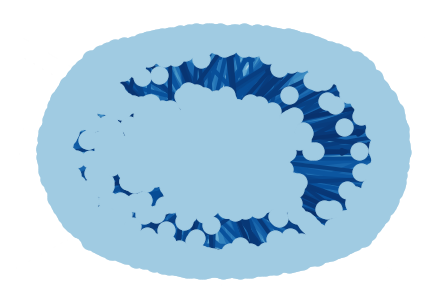

In [180]:
pos = nx.layout.spring_layout(G)
colors = range(31603)
options = {
    "node_color": "#A0CBE2",
    "edge_color": colors,
    "width": 4,
    "edge_cmap": plt.cm.Blues,
    "with_labels": False,
}
nx.draw(G, pos, **options)
plt.show()

In [0]:
# the following are not implemented for directed graphs
largest_cc = max(nx.connected_components(G), key=len)

In [191]:
print("Has Attracting Components:               ", nx.is_attracting_component(G))
print("Strongly Connected:                      ", nx.is_strongly_connected(G))
print("Weakly Connected:                        ", nx.is_weakly_connected(G))
print("Semi Connected:                          ", nx.is_semiconnected(G))
print("Number of Strongly Connected Components: ", nx.number_strongly_connected_components(G))
print("Number of Attracting Components or HUBS: ", nx.number_attracting_components(G))
print("Number of Weakly Connected Components:   ", nx.number_weakly_connected_components(G))

smallest_weakly_cc = min(nx.weakly_connected_components(G), key=len)
print("Smallest Weakly Connected Component:     ", len(smallest_weakly_cc))

Has Attracting Components:                False
Strongly Connected:                       False
Weakly Connected:                         False
Semi Connected:                           False
Number of Strongly Connected Components:  5026
Number of Attracting Components or HUBS:  1355
Number of Weakly Connected Components:    8
Smallest Weakly Connected Component:      2


In [0]:
sh_paths = dict(nx.all_pairs_shortest_path(G))

In [225]:
sh_paths['0200072fd301cb4a680f26d87c28b705ccd6a1d5b00f1b5efd7fe5f998f1bbb1f1']

{'0200072fd301cb4a680f26d87c28b705ccd6a1d5b00f1b5efd7fe5f998f1bbb1f1': ['0200072fd301cb4a680f26d87c28b705ccd6a1d5b00f1b5efd7fe5f998f1bbb1f1'],
 '023b7dba0075975778c820a56a157de5eed67e988e6c7edd723af73ad20e4463ed': ['0200072fd301cb4a680f26d87c28b705ccd6a1d5b00f1b5efd7fe5f998f1bbb1f1',
  '023b7dba0075975778c820a56a157de5eed67e988e6c7edd723af73ad20e4463ed']}